In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv('asthma_disease_data.csv')

# Drop non-relevant columns
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Handle missing values by filling with mean for numerical and mode for categorical columns
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for duplicates
df.drop_duplicates(inplace=True)

# Convert categorical variables
df["Gender"] = df["Gender"].astype("category")
df["Ethnicity"] = df["Ethnicity"].astype("category")
df["EducationLevel"] = df["EducationLevel"].astype("category")

# Feature-target split
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     2392 non-null   int64   
 1   Gender                  2392 non-null   category
 2   Ethnicity               2392 non-null   category
 3   EducationLevel          2392 non-null   category
 4   BMI                     2392 non-null   float64 
 5   Smoking                 2392 non-null   int64   
 6   PhysicalActivity        2392 non-null   float64 
 7   DietQuality             2392 non-null   float64 
 8   SleepQuality            2392 non-null   float64 
 9   PollutionExposure       2392 non-null   float64 
 10  PollenExposure          2392 non-null   float64 
 11  DustExposure            2392 non-null   float64 
 12  PetAllergy              2392 non-null   int64   
 13  FamilyHistoryAsthma     2392 non-null   int64   
 14  HistoryOfAllergies      

In [3]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [4]:
#len(downsampled_class_0), len(upsampled_class_1), class_size

In [5]:
# Handle class imbalance using upsampling and downsampling before train-test split
class_0 = df[df['Diagnosis'] == 0]
class_1 = df[df['Diagnosis'] == 1]
class_size = int(len(df)/2)  # Set target size

downsampled_class_0 = resample(class_0, replace=False, n_samples=class_size, random_state=42)
upsampled_class_1 = resample(class_1, replace=True, n_samples=class_size, random_state=42)

balanced_df = pd.concat([downsampled_class_0, upsampled_class_1])
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 188 to 2256
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     2392 non-null   int64   
 1   Gender                  2392 non-null   category
 2   Ethnicity               2392 non-null   category
 3   EducationLevel          2392 non-null   category
 4   BMI                     2392 non-null   float64 
 5   Smoking                 2392 non-null   int64   
 6   PhysicalActivity        2392 non-null   float64 
 7   DietQuality             2392 non-null   float64 
 8   SleepQuality            2392 non-null   float64 
 9   PollutionExposure       2392 non-null   float64 
 10  PollenExposure          2392 non-null   float64 
 11  DustExposure            2392 non-null   float64 
 12  PetAllergy              2392 non-null   int64   
 13  FamilyHistoryAsthma     2392 non-null   int64   
 14  HistoryOfAllergies      239

In [6]:
balanced_df['Diagnosis'].value_counts()

Diagnosis
0    1196
1    1196
Name: count, dtype: int64

In [7]:
X_balanced = balanced_df.drop(columns=["Diagnosis"])
y_balanced = balanced_df["Diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Standardize numerical features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

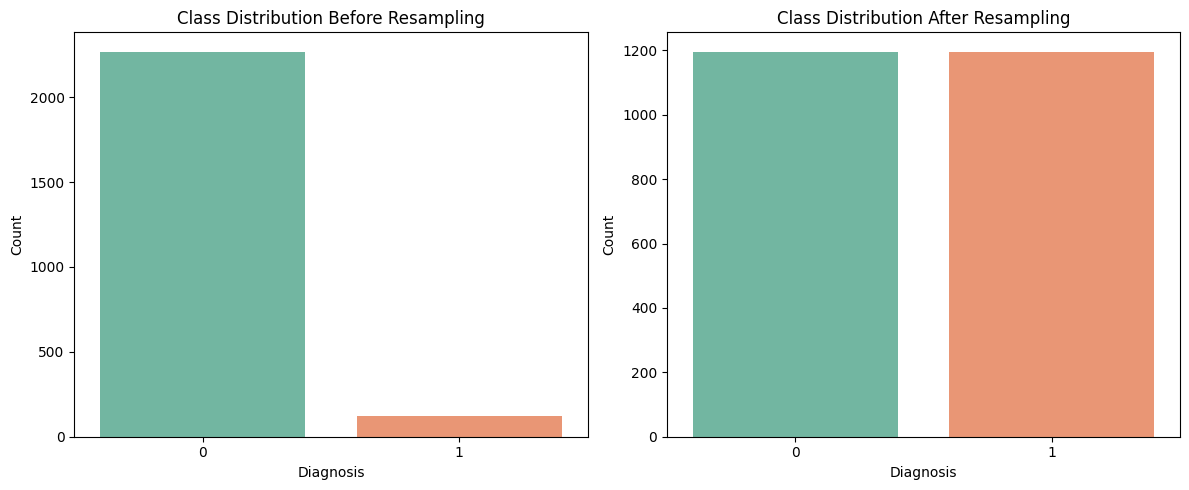

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling
sns.countplot(x=df['Diagnosis'], palette='Set2', ax=axes[0])
axes[0].set_title('Class Distribution Before Resampling')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

# After resampling
sns.countplot(x=balanced_df['Diagnosis'], palette='Set2', ax=axes[1])
axes[1].set_title('Class Distribution After Resampling')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Logistic Regression Best Parameters: {'C': 1}
Logistic Regression Accuracy: 0.6075
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       240
           1       0.60      0.64      0.62       239

    accuracy                           0.61       479
   macro avg       0.61      0.61      0.61       479
weighted avg       0.61      0.61      0.61       479


Decision Tree Best Parameters: {'max_depth': 10}
Decision Tree Accuracy: 0.8476
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       240
           1       0.78      0.97      0.86       239

    accuracy                           0.85       479
   macro avg       0.87      0.85      0.85       479
weighted avg       0.87      0.85      0.85       479


Random Forest Best Parameters: {'n_estimators': 100}
Random Forest Accuracy: 1.0000
Random Forest Cla

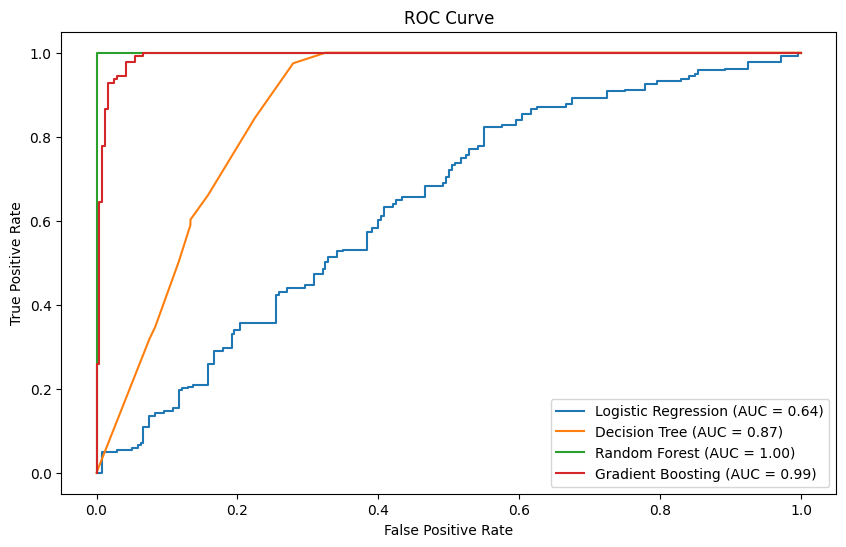

Best Model: Random Forest (AUC = 1.00)


In [9]:
param_grids = {
    "Logistic Regression": GridSearchCV(LogisticRegression(random_state=42), param_grid={'C': [0.1, 1, 10]}, cv=5),
    "Decision Tree": GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': [3, 5, 10]}, cv=5),
    "Random Forest": GridSearchCV(RandomForestClassifier(random_state=42), param_grid={'n_estimators': [50, 100, 200]}, cv=5),
    "Gradient Boosting": GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid={'learning_rate': [0.01, 0.1, 0.2]}, cv=5)
}

# Train and evaluate models
plt.figure(figsize=(10, 6))
best_model = None
best_auc = 0
best_model_name = ""
feature_importances = None

for name, grid in param_grids.items():
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    
    print(f"{name} Best Parameters: {grid.best_params_}")
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_model = model
        best_model_name = name
        
        # Extract feature importances if applicable
        if hasattr(model, "feature_importances_"):
            feature_importances = model.feature_importances_

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"Best Model: {best_model_name} (AUC = {best_auc:.2f})")

In [10]:
gradient_boosting = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid={'learning_rate': [0.01, 0.1, 0.2]}, cv=5)
gradient_boosting.fit(X_train, y_train)
feature_importances = gradient_boosting.best_estimator_.feature_importances_

Feature Importances:
LungFunctionFVC: 0.1131
PhysicalActivity: 0.1045
DietQuality: 0.1018
PollenExposure: 0.0956
LungFunctionFEV1: 0.0838
PollutionExposure: 0.0826
SleepQuality: 0.0813
BMI: 0.0744
DustExposure: 0.0715
Age: 0.0601
ExerciseInduced: 0.0249
Ethnicity: 0.0224
Coughing: 0.0153
Wheezing: 0.0132
EducationLevel: 0.0107
HayFever: 0.0106
ChestTightness: 0.0092
PetAllergy: 0.0080
Smoking: 0.0052
GastroesophagealReflux: 0.0040
ShortnessOfBreath: 0.0031
FamilyHistoryAsthma: 0.0018
HistoryOfAllergies: 0.0014
Gender: 0.0009
NighttimeSymptoms: 0.0004
Eczema: 0.0002


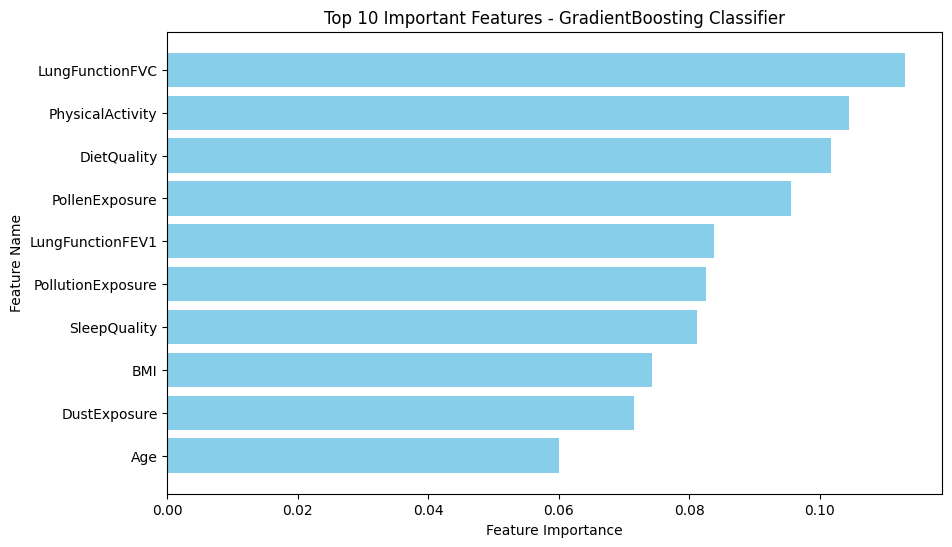

In [11]:
if feature_importances is not None:
    sorted_idx = np.argsort(feature_importances)[::-1]
    feature_names = X_train.columns  # Assuming X_train is a DataFrame
    
    print("Feature Importances:")
    for idx in sorted_idx:
        print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")
    
    # Plot top features
    plt.figure(figsize=(10, 6))
    top_n = min(10, len(feature_importances))  # Show top 10 features or fewer
    plt.barh(feature_names[sorted_idx][:top_n], feature_importances[sorted_idx][:top_n], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title(f"Top {top_n} Important Features - GradientBoosting Classifier")
    plt.gca().invert_yaxis()
    plt.show()

In [12]:
import pickle

In [13]:
with open("bestmodel.pkl", "wb") as f:
    pickle.dump(gradient_boosting, f)

In [14]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)